In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('defenders_rating_saves_X.csv')
y = pd.read_csv('defenders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w   assists  chances2score  clearances  \
0             1.0        0.0        0.0  0.054054       0.084577    0.031250   
1             0.0        1.0        0.0  0.027027       0.054726    0.018750   
2             1.0        0.0        0.0  0.135135       0.099502    0.157812   
3             1.0        0.0        0.0  0.054054       0.019900    0.004687   
4             0.0        0.0        1.0  0.054054       0.094527    0.037500   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  \
0          0.0     0.000000       0.162162      0.162791  ...   
1          0.0     0.000000       0.051351      0.034884  ...   
2          0.0     0.178571       0.202703      0.127907  ...   
3          0.0     0.000000       0.081081      0.034884  ...   
4          0.0     0.047619       0.081081      0.000000  ...   

   betweenness_centrality  closeness_centrality  flow_centrality  \
0                0.120301              0.114286         0.49

In [4]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'missed_penalties',
       'offsides', 'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost',
       'rcards', 'shots_offtarget', 'shots_ontarget', 'shotsblocked',
       'stop_shots', 'tballs_acc', 'tballs_inacc', 'touches', 'wasfouled',
       'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_DC',
       'pos_role_DL', 'pos_role_DR'],
      dtype='object')

In [5]:
X.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,...,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,flow_success,minutesPlayed,pos_role_DC,pos_role_DL,pos_role_DR
0,1.0,0.0,0.0,0.054054,0.084577,0.031250,0.0,0.000000,0.162162,0.162791,...,0.120301,0.114286,0.499633,0.415875,0.389272,0.379695,0.0,0.0,0.153629,0.673913
1,0.0,1.0,0.0,0.027027,0.054726,0.018750,0.0,0.000000,0.051351,0.034884,...,0.022556,0.085714,0.576613,0.578008,0.661047,0.400219,0.0,0.0,0.097120,0.500000
2,1.0,0.0,0.0,0.135135,0.099502,0.157812,0.0,0.178571,0.202703,0.127907,...,0.157895,0.114286,0.583259,0.299951,0.453985,0.430574,0.0,0.0,0.683551,0.645963
3,1.0,0.0,0.0,0.054054,0.019900,0.004687,0.0,0.000000,0.081081,0.034884,...,0.090226,0.085714,0.543622,0.481862,0.435517,0.461259,0.0,0.0,0.238430,0.673913
4,0.0,0.0,1.0,0.054054,0.094527,0.037500,0.0,0.047619,0.081081,0.000000,...,0.150376,0.114286,0.571114,0.493501,0.502152,0.344379,0.0,0.0,0.506008,0.673913


In [6]:
y.head()

,tackles
0,28
1,18
2,33
3,30
4,43


In [7]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['betweenness_centrality',
 'chances2score',
 'clearances',
 'crosses_inacc',
 'degree_centrality',
 'drib_unsuccess',
 'game_duration',
 'grduels_w',
 'keypasses',
 'lballs_acc',
 'lballs_inacc',
 'missed_penalties',
 'offsides',
 'owngoals',
 'rcards',
 'shots_offtarget',
 'shots_ontarget',
 'stop_shots',
 'tballs_acc',
 'touches'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   matches_played  aerials_l  aerials_w   assists  countattack  crosses_acc  \
0             1.0        0.0        0.0  0.054054          0.0     0.000000   
1             0.0        1.0        0.0  0.027027          0.0     0.000000   
2             1.0        0.0        0.0  0.135135          0.0     0.178571   
3             1.0        0.0        0.0  0.054054          0.0     0.000000   
4             0.0        0.0        1.0  0.054054          0.0     0.047619   

   dangmistakes  drib_success  dribbled_past     fouls  ...  wasfouled  \
0      0.162791      0.000000       0.148148  0.041237  ...        0.0   
1      0.034884      0.051793       0.000000  0.000000  ...        0.0   
2      0.127907      0.000000       0.296296  0.000000  ...        0.0   
3      0.034884      0.000000       0.000000  0.000000  ...        0.0   
4      0.000000      0.000000       0.000000  0.000000  ...        0.0   

   ycards  closeness_centrality  flow_centrality  betweenness2goals  \
0    0.00

## Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 391
Validation set size: 131
Test set size: 131


In [10]:
X_train.head()

,matches_played,aerials_l,aerials_w,assists,countattack,crosses_acc,dangmistakes,drib_success,dribbled_past,fouls,...,wasfouled,ycards,closeness_centrality,flow_centrality,betweenness2goals,flow_success,minutesPlayed,pos_role_DC,pos_role_DL,pos_role_DR
299,1.0,0.0,0.0,0.837838,0.064516,0.535714,0.348837,0.035857,1.0,0.340206,...,0.115385,0.17,0.514286,0.687015,0.546521,0.500988,0.151799,0.0,0.312935,0.674630
112,1.0,0.0,0.0,0.027027,0.000000,0.107143,0.069767,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.462624,0.299025,0.368814,0.000000,0.0,0.399281,0.673913
532,1.0,0.0,0.0,0.135135,0.000000,0.000000,0.279070,0.000000,0.0,0.123711,...,0.153846,0.04,0.000000,0.548697,0.468474,0.432456,0.192308,0.0,0.385185,0.673913
462,0.0,0.0,1.0,0.027027,0.000000,0.000000,0.046512,0.015936,0.0,0.103093,...,0.115385,0.04,0.000000,0.604839,0.548684,0.617489,0.000000,0.0,0.154175,0.673913
613,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.046512,0.000000,0.0,0.000000,...,0.000000,0.00,0.114286,0.153226,0.177668,0.049494,0.000000,0.0,0.000000,0.673913


In [11]:
X_val.shape

(131, 28)

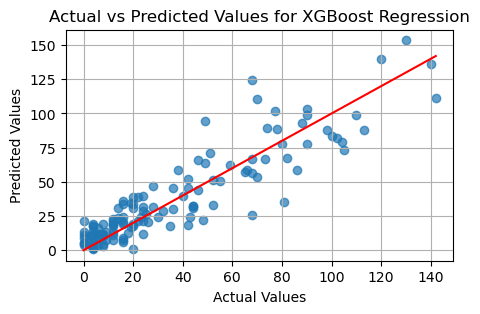

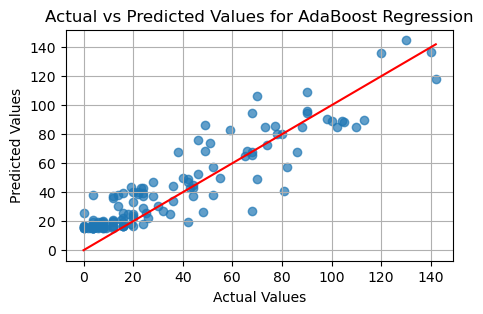

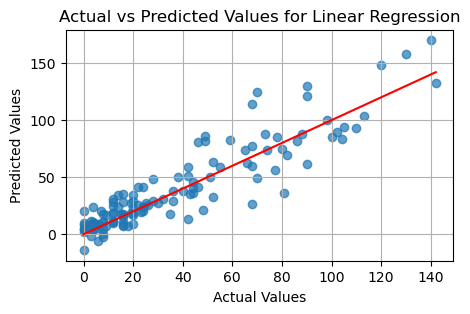

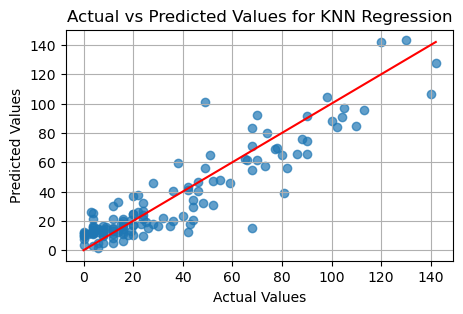

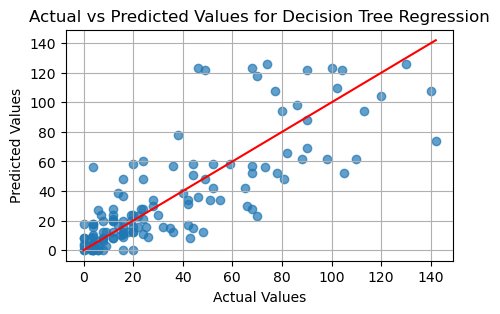

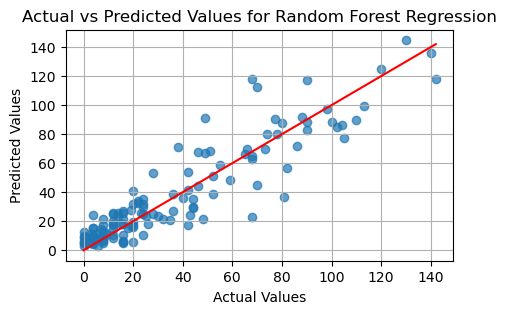

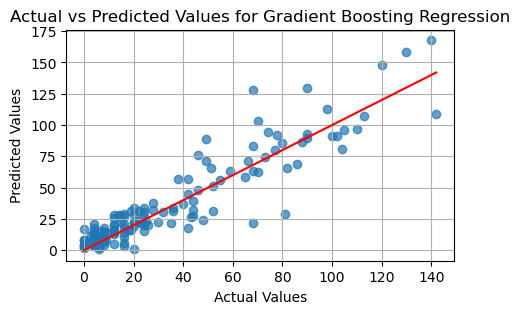

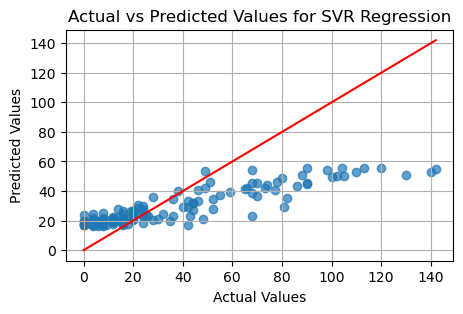

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


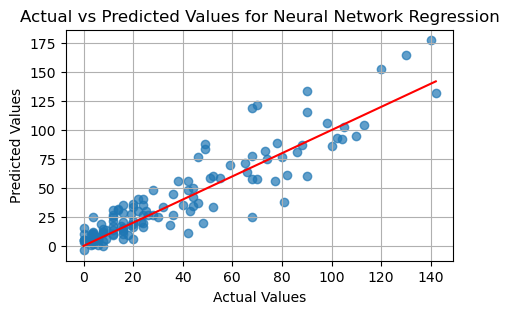

                          Model        MSE      RMSE       R2       MAE  \
0            XGBoost Regression  227.24625  15.07469  0.81119  11.15320   
1           AdaBoost Regression  232.82733  15.25868  0.80656  12.31291   
2             Linear Regression  237.27863  15.40385  0.80286  10.73282   
3                KNN Regression  198.66656  14.09491  0.83494  10.73130   
4      Decision Tree Regression  504.09924  22.45215  0.58117  15.64122   
5      Random Forest Regression  200.22633  14.15014  0.83364  10.11481   
6  Gradient Boosting Regression  217.41661  14.74505  0.81936  10.22700   
7                SVR Regression  643.09552  25.35933  0.46569  18.42848   
8     Neural Network Regression  242.91588  15.58576  0.79818  10.92439   

         R  
0  0.90404  
1  0.91665  
2  0.91315  
3  0.91454  
4  0.79468  
5  0.91529  
6  0.91799  
7  0.90411  
8  0.91437  


In [12]:
# Features after removing correlated features, using base model, evaluation on val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()


# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name, 
        'MSE': f'{mse:.5f}', 
        'RMSE': f'{rmse:.5f}', 
        'R2': f'{r2:.5f}', 
        'MAE': f'{mae:.5f}',
        'R': f'{r:.5f}'
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


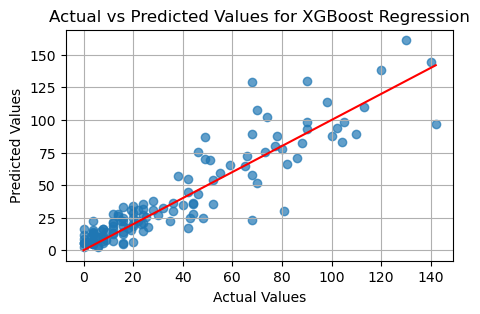

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.1, 'n_estimators': 200}


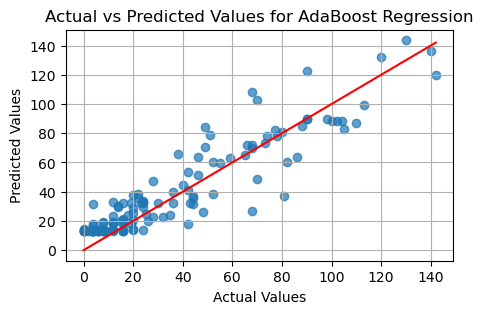

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


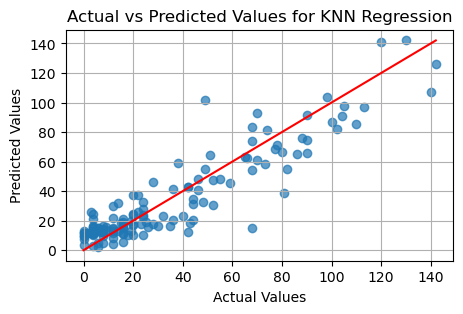

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 20}


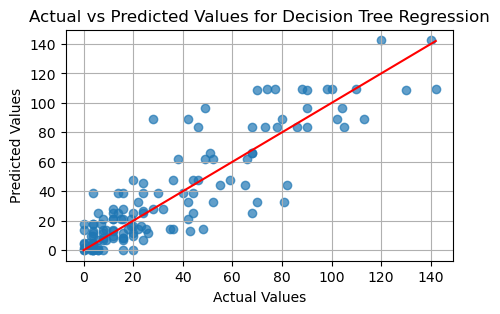

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


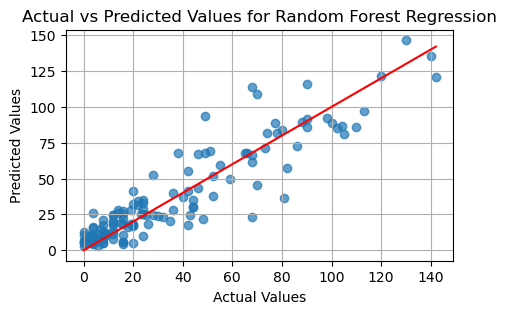

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


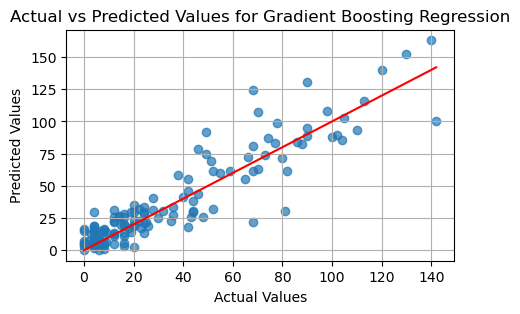

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


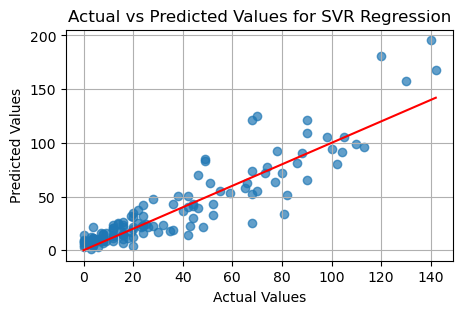

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


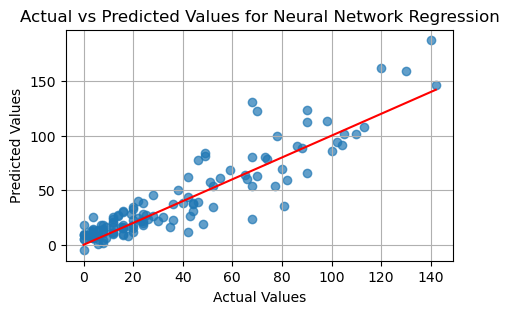

                          Model         MSE        MAE        R2       RMSE
0            XGBoost Regression  221.857762  10.260532  0.815672  14.894890
1           AdaBoost Regression  191.312112  10.709013  0.841050  13.831562
2                KNN Regression  197.129127  10.661927  0.836217  14.040268
3      Decision Tree Regression  307.902471  12.744774  0.744182  17.547150
4      Random Forest Regression  193.338589   9.964185  0.839366  13.904625
5  Gradient Boosting Regression  223.754354  10.570129  0.814096  14.958421
6                SVR Regression  263.430118  10.949830  0.781132  16.230530
7     Neural Network Regression  253.192075  11.038749  0.789638  15.912010


In [13]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model       RMSE         MSE        MAE        R2  \
0            XGBoost Regression  18.574199  345.000868  12.000876  0.849552   
1           AdaBoost Regression  20.281353  411.333262  13.899370  0.820626   
2                KNN Regression  23.467128  550.706089  14.980311  0.759849   
3      Decision Tree Regression  23.908168  571.600494  14.765102  0.750737   
4      Random Forest Regression  20.349388  414.097604  12.339269  0.819421   
5  Gradient Boosting Regression  19.499592  380.234086  12.071323  0.834188   
6                SVR Regression  21.706618  471.177262  12.935294  0.794530   
7     Neural Network Regression  20.330694  413.337111  12.791565  0.819752   

          R  
0  0.924425  
1  0.921825  
2  0.888718  
3  0.868153  
4  0.912807  
5  0.916514  
6  0.894154  
7  0.910377  


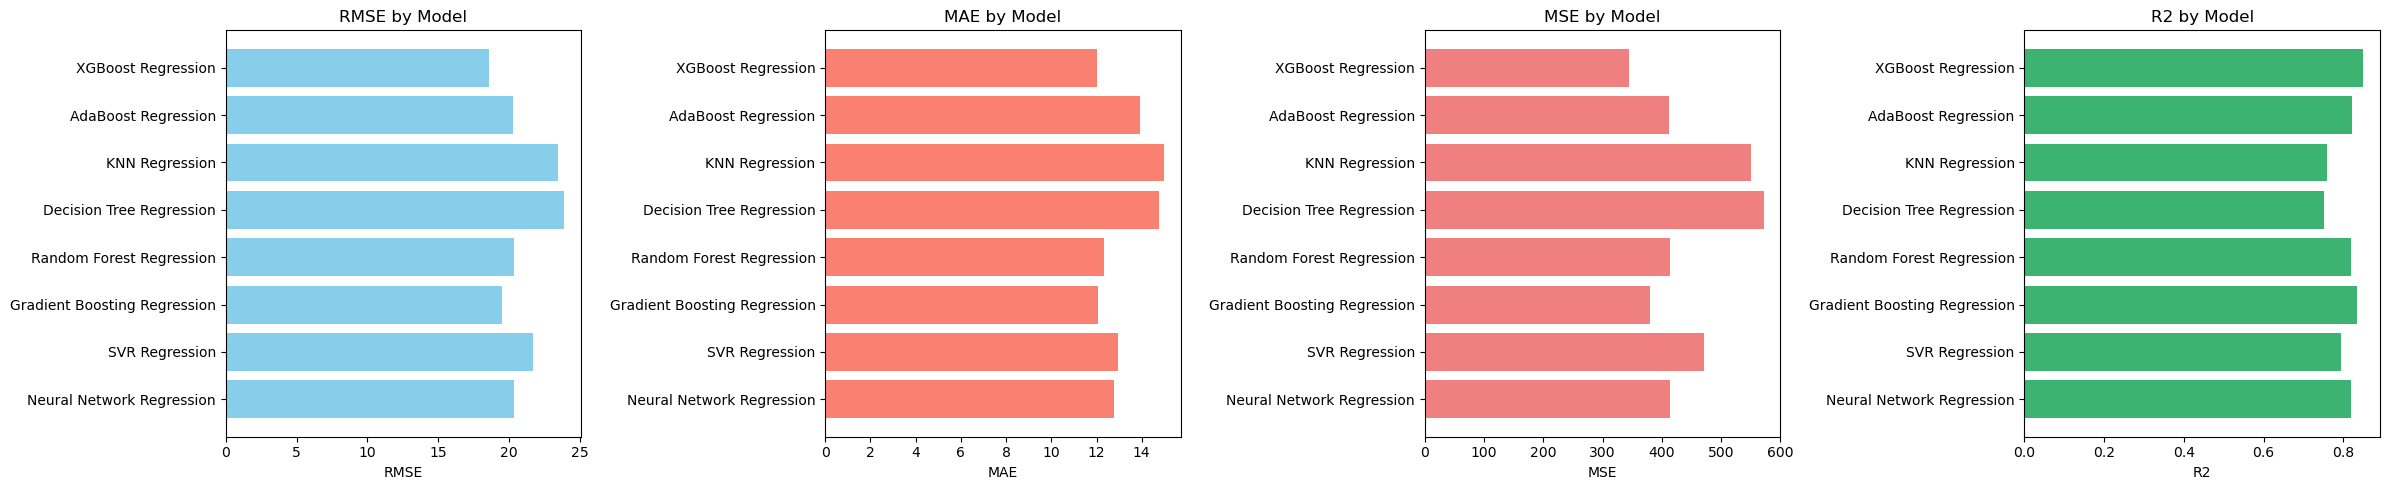

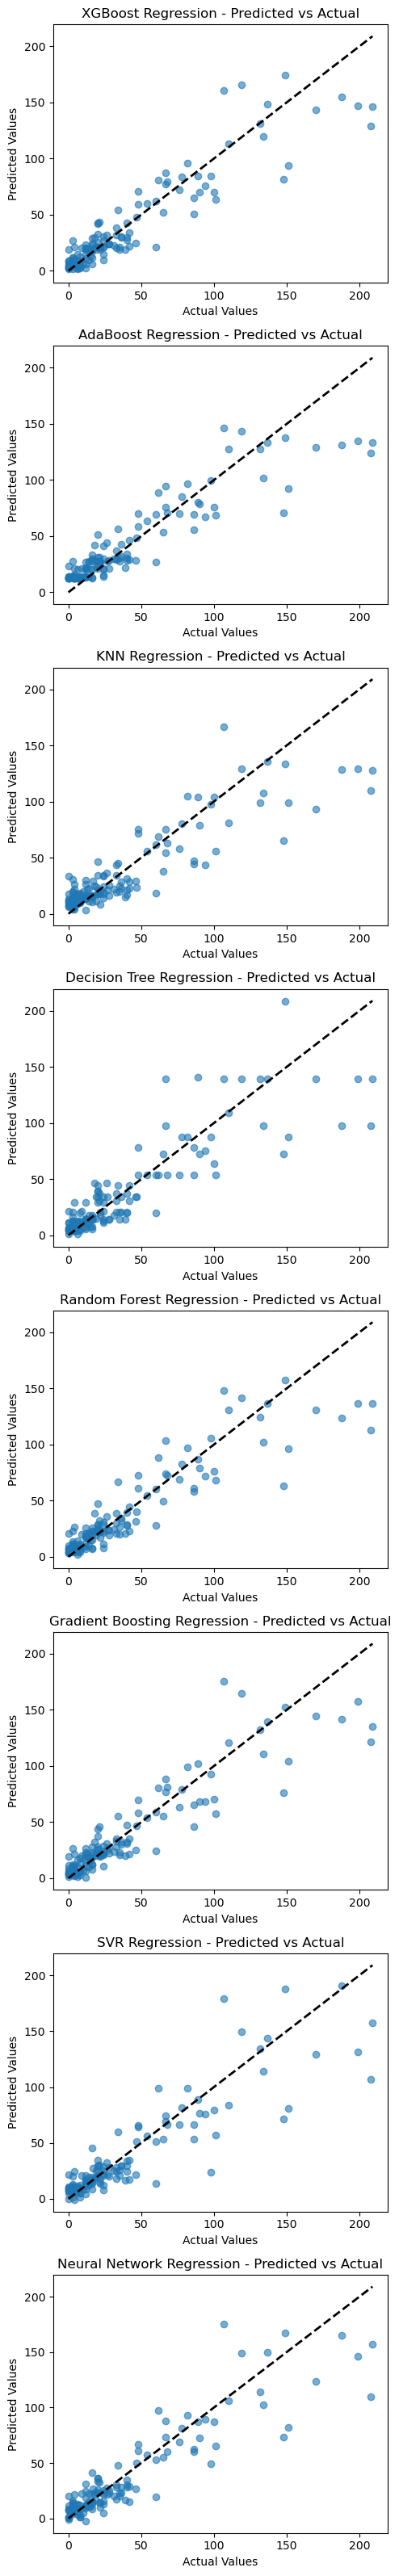

In [14]:

#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])


# Define models with the best parameters found

            
best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'poly', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam'},
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                 Feature  Importance
3                assists    0.631237
11             grduels_l    0.176141
6           dangmistakes    0.038318
20  closeness_centrality    0.024682
0         matches_played    0.021724
9                  fouls    0.017538
19                ycards    0.011976
26           pos_role_DL    0.011962
4            countattack    0.008452
7           drib_success    0.007593
5            crosses_acc    0.007462
27           pos_role_DR    0.007342
17          tballs_inacc    0.006857
24         minutesPlayed    0.004229
21       flow_centrality    0.003796
18             wasfouled    0.003453
15             poss_lost    0.003378
8          dribbled_past    0.002615
10                 goals    0.002607
23          flow_success    0.002561
22     betweenness2goals    0.002250
14          passes_inacc    0.001844
16          shotsblocked    0.000506
12         interceptions    0.000447
25           pos_role_DC    0.000404
1              aerials_l    0.000352
2

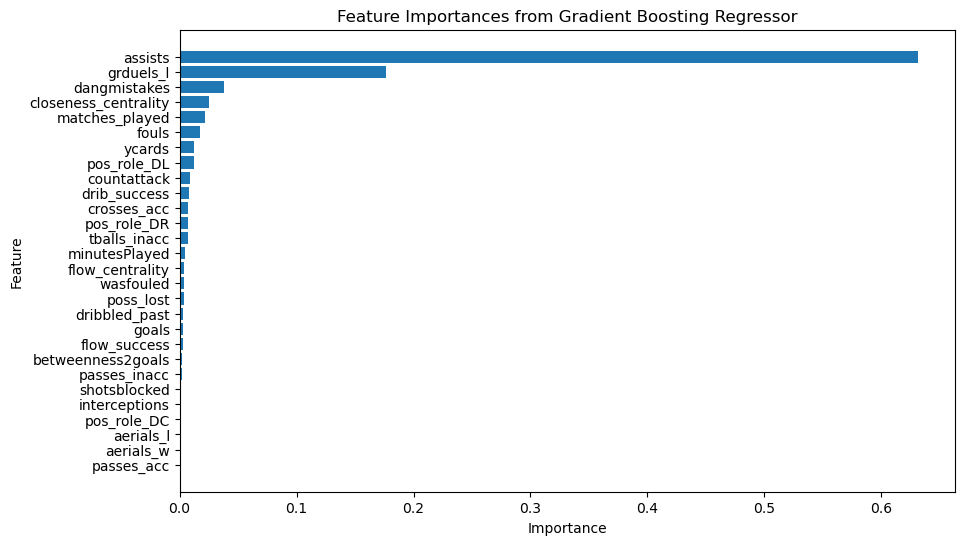

In [15]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.2
n_estimators = 50
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [16]:
X.shape

(653, 28)

In [17]:
#using subsets of features and performing parameter tunning it
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=50, learning_rate=0.2)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_20': feature_importances.index[:20],
    'top_28': feature_importances.index[:28]
}

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    }),
     (LinearRegression(), 'Linear Regression', {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [-1,2,3]
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

results = []

for subset_name, features in feature_subsets.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    for model, name, params in models:
        mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
        if best_model is not None:
            results.append({
                'Subset': subset_name,
                'Model': name,
                'MSE': f'{mse:.5f}',
                'MAE': f'{mae:.5f}',
                'RMSE': f'{rmse:.5f}',
                'R2 Score': f'{r2:.5f}',
                'Best Params': best_params,
                'Training Time (s)': f'{training_time:.5f}'
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model        MSE       MAE      RMSE  \
0    top_5            XGBoost Regression  199.67235   9.83886  14.13055   
1    top_5           AdaBoost Regression  198.59742  10.34288  14.09246   
2    top_5                KNN Regression  181.95108   9.83860  13.48892   
3    top_5      Decision Tree Regression  244.06040  10.88695  15.62243   
4    top_5      Random Forest Regression  214.78000  10.50130  14.65537   
5    top_5  Gradient Boosting Regression  205.49171   9.94207  14.33498   
6    top_5                SVR Regression  184.27404   9.54917  13.57476   
7    top_5     Neural Network Regression  200.16257  10.24998  14.14788   
8    top_5             Linear Regression  205.98777  10.22374  14.35227   
9   top_10            XGBoost Regression  200.18421   9.39813  14.14865   
10  top_10           AdaBoost Regression  180.38839   9.94821  13.43087   
11  top_10                KNN Regression  176.42312  10.02013  13.28244   
12  top_10      Decision 

In [18]:
print(results_df[['Subset', 'Model', 'MSE',  'MAE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model        MSE       MAE R2 Score  \
0    top_5            XGBoost Regression  199.67235   9.83886  0.83410   
1    top_5           AdaBoost Regression  198.59742  10.34288  0.83500   
2    top_5                KNN Regression  181.95108   9.83860  0.84883   
3    top_5      Decision Tree Regression  244.06040  10.88695  0.79722   
4    top_5      Random Forest Regression  214.78000  10.50130  0.82155   
5    top_5  Gradient Boosting Regression  205.49171   9.94207  0.82927   
6    top_5                SVR Regression  184.27404   9.54917  0.84690   
7    top_5     Neural Network Regression  200.16257  10.24998  0.83370   
8    top_5             Linear Regression  205.98777  10.22374  0.82886   
9   top_10            XGBoost Regression  200.18421   9.39813  0.83368   
10  top_10           AdaBoost Regression  180.38839   9.94821  0.85013   
11  top_10                KNN Regression  176.42312  10.02013  0.85342   
12  top_10      Decision Tree Regressi

In [19]:
#visualising the best subsets to use
import pandas as pd

# Assuming results_df is already defined and contains your results
# Convert only the metric columns to numeric values for averaging
metric_columns = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']
for col in metric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Group by subset and calculate the mean of each metric
subset_averages = results_df.groupby('Subset')[metric_columns].mean().reset_index()

# Display the averaged results
print(subset_averages)

   Subset         MSE        MAE       RMSE  R2 Score  Training Time (s)
0  top_10  199.822657  10.140702  14.093249  0.833980          11.448804
1  top_20  220.612783  10.616988  14.820734  0.816707          17.786448
2  top_28  239.531577  10.876986  15.407143  0.800988          19.008317
3   top_5  203.886371  10.152617  14.266624  0.830603          10.220548


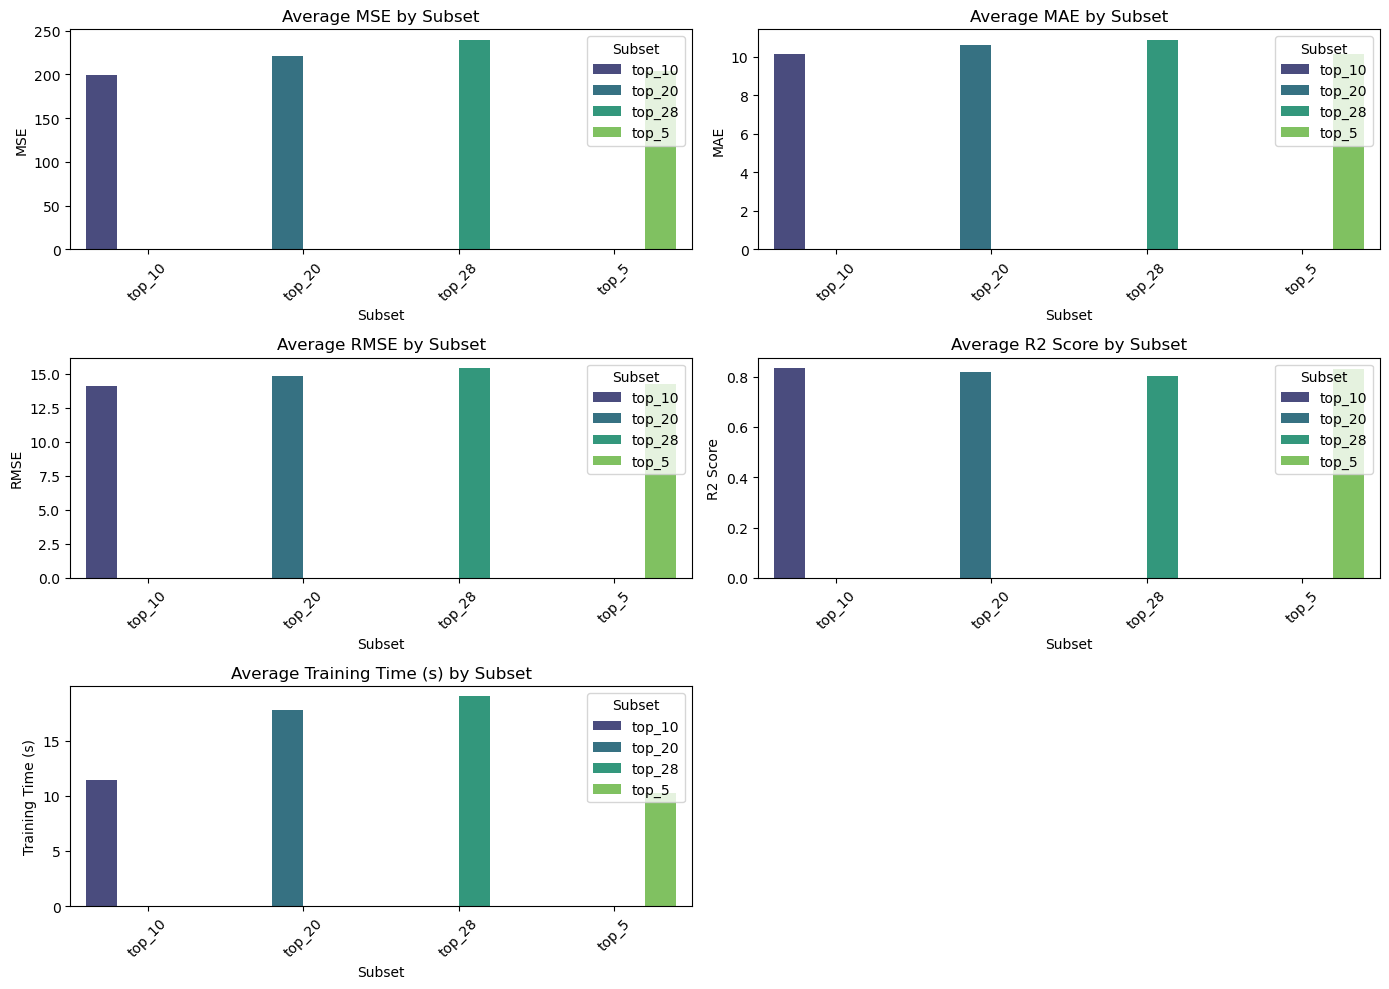

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Plotting the averages for each metric
metrics = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=subset_averages, x='Subset', y=metric, hue='Subset', palette='viridis')
    plt.title(f'Average {metric} by Subset')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

                          Model         MSE        MAE       RMSE        R2  \
0            XGBoost Regression  366.636542  12.105912  19.147756  0.840118   
1           AdaBoost Regression  423.127951  13.066454  20.570074  0.815483   
2                KNN Regression  441.099029  13.147546  21.002358  0.807646   
3      Decision Tree Regression  524.166920  14.717154  22.894692  0.771422   
4      Random Forest Regression  439.227595  12.980153  20.957757  0.808462   
5  Gradient Boosting Regression  372.255014  12.126019  19.293911  0.837667   
6                SVR Regression  466.740241  12.343326  21.604172  0.796464   
7     Neural Network Regression  379.568977  12.228333  19.482530  0.834478   

          R  
0  0.918926  
1  0.914741  
2  0.914289  
3  0.879995  
4  0.902984  
5  0.918965  
6  0.912242  
7  0.916675  


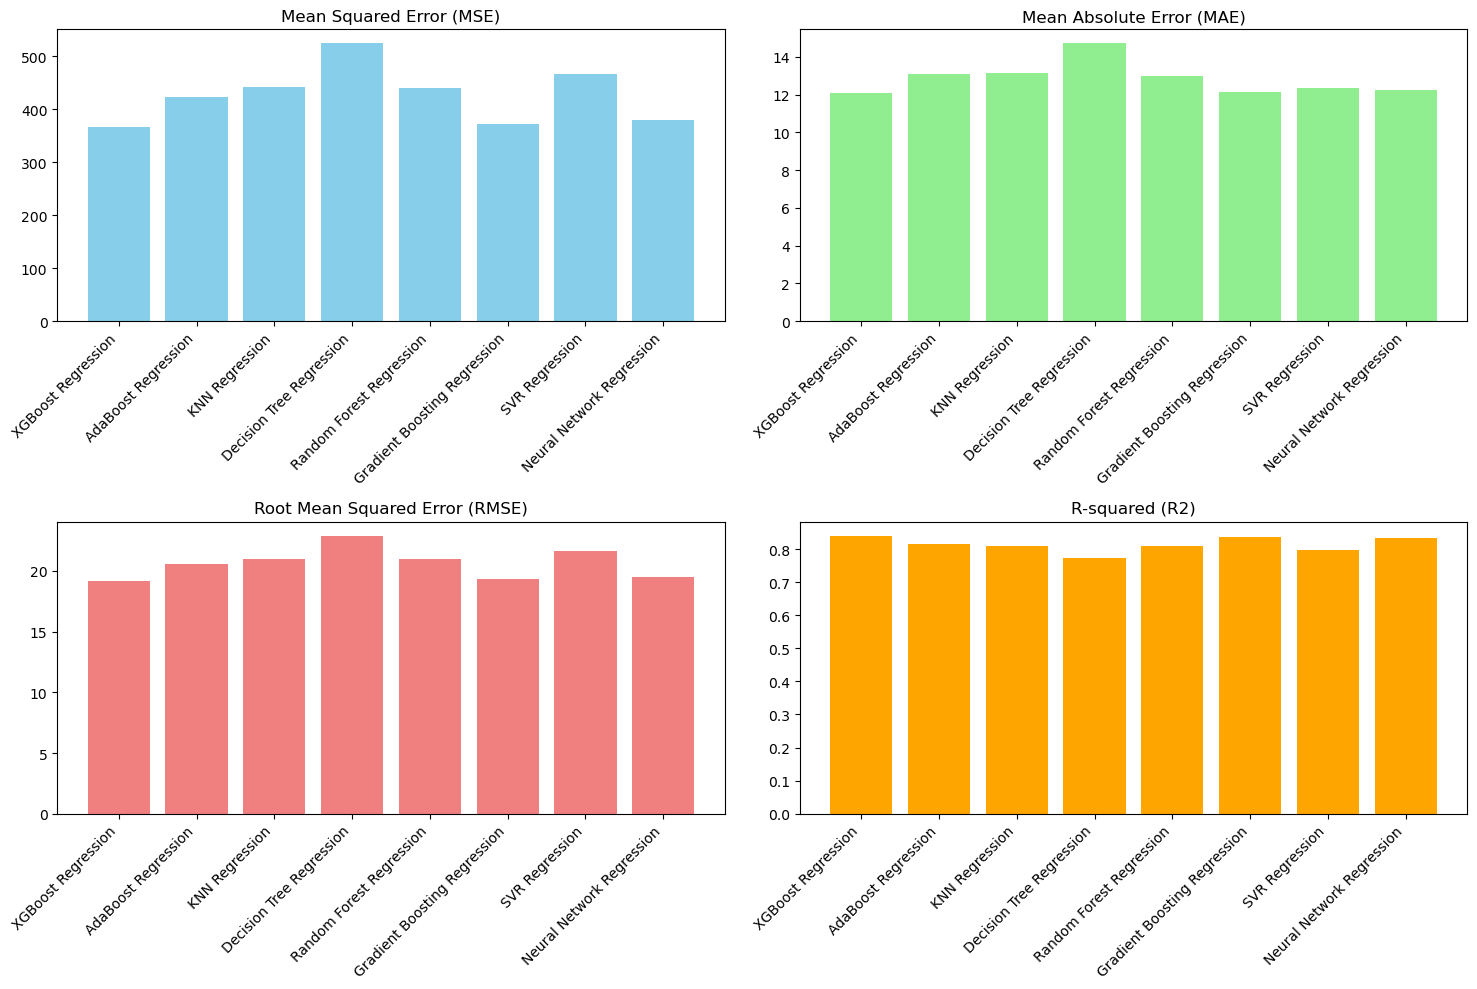

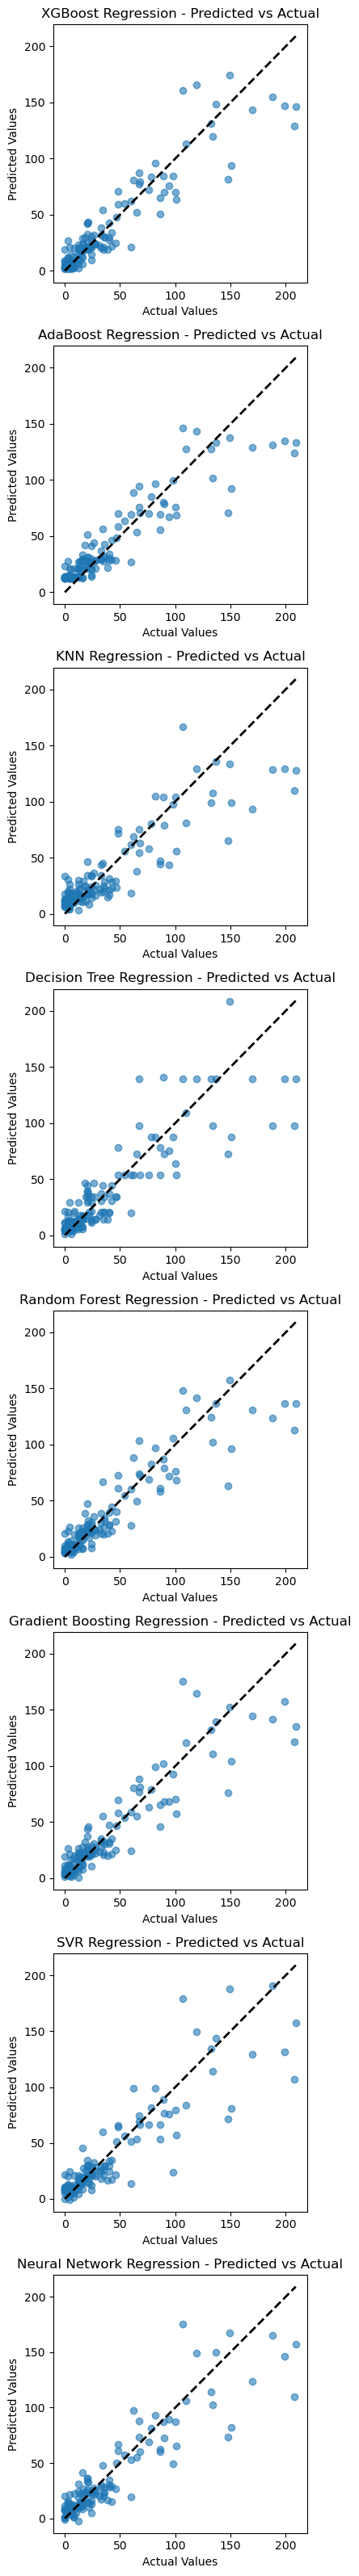

In [22]:
#using top 10 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found


best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 10, 'max_depth': 20, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':False, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

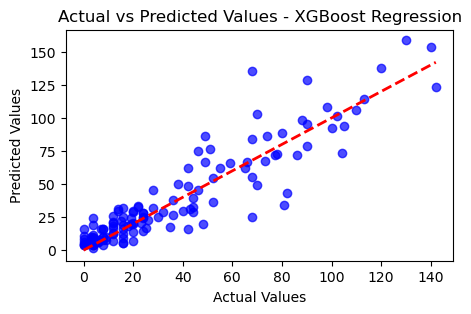

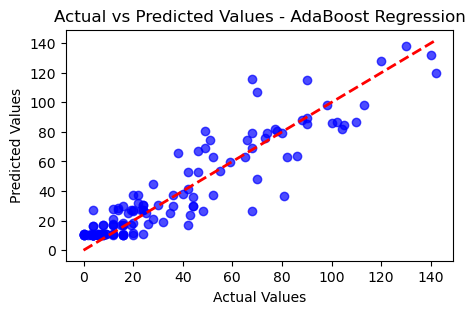

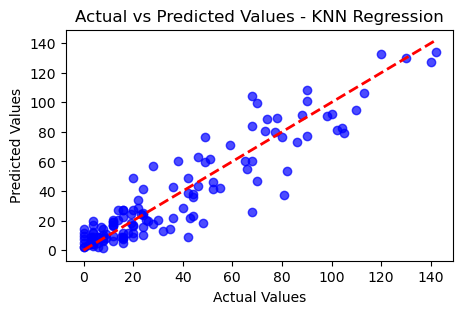

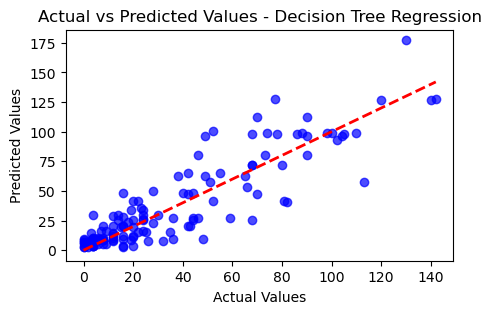

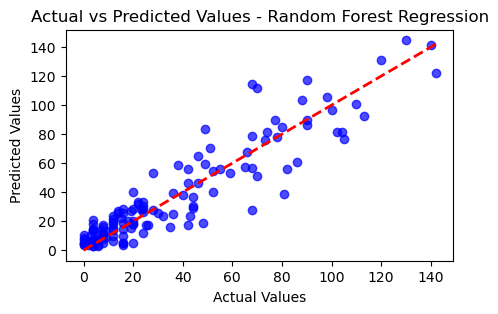

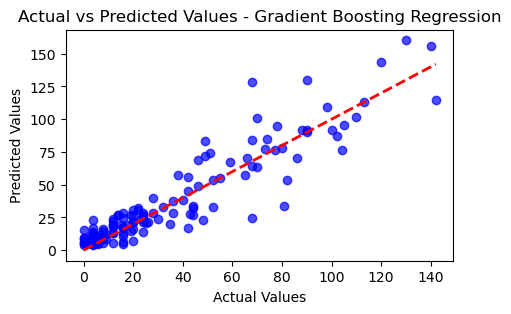

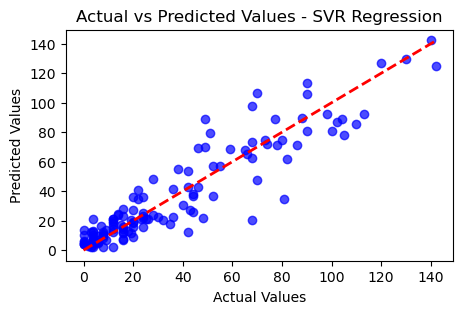

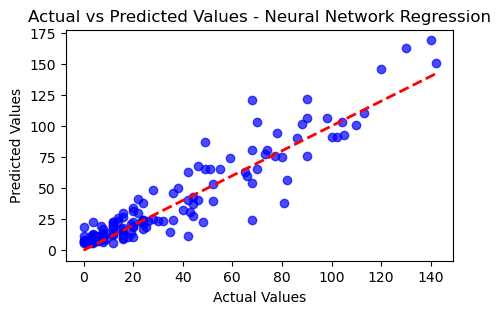

  Subset                         Model        MSE       MAE      RMSE  \
0  top_5            XGBoost Regression  215.89027   9.97640  14.69320   
1  top_5           AdaBoost Regression  180.38839   9.94821  13.43087   
2  top_5                KNN Regression  176.42312  10.02013  13.28244   
3  top_5      Decision Tree Regression  305.80217  12.37847  17.48720   
4  top_5      Random Forest Regression  186.05813   9.91618  13.64031   
5  top_5  Gradient Boosting Regression  198.13552   9.62406  14.07606   
6  top_5                SVR Regression  175.97120   9.39682  13.26541   
7  top_5     Neural Network Regression  191.00725   9.97469  13.82054   

        R2                                  Best Params Training Time (s)  
0  0.82063  {'colsample_bytree': 0.7, 'subsample': 0.7}           4.08488  
1  0.85013                           {'loss': 'linear'}           2.15931  
2  0.85342                            {'leaf_size': 10}           0.08838  
3  0.74593                      {'min_

In [23]:
#using more parameters to tune the top 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

    
# Define models with parameter grids for hyperparameter tuning
   

models = [
    (XGBRegressor(random_state=random_state,n_estimators=100,learning_rate=0.1,max_depth=3), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.1,n_estimators=100), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='auto'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=None,min_samples_split=10), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=20,min_samples_split=2,n_estimators=100), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,max_depth=3,n_estimators=50), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=10,gamma='scale',kernel='linear'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (50,50),activation='relu', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_5',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model         MSE        MAE       RMSE        R2  \
0            XGBoost Regression  404.313246  12.688641  20.107542  0.823688   
1           AdaBoost Regression  423.127951  13.066454  20.570074  0.815483   
2                KNN Regression  441.099029  13.147546  21.002358  0.807646   
3      Decision Tree Regression  453.015339  13.939175  21.284157  0.802450   
4      Random Forest Regression  439.227595  12.980153  20.957757  0.808462   
5  Gradient Boosting Regression  372.255014  12.126019  19.293911  0.837667   
6                SVR Regression  466.946235  12.343569  21.608939  0.796375   
7     Neural Network Regression  376.277279  12.212001  19.397868  0.835913   

          R  
0  0.908978  
1  0.914741  
2  0.914289  
3  0.897664  
4  0.902984  
5  0.918965  
6  0.912172  
7  0.917539  


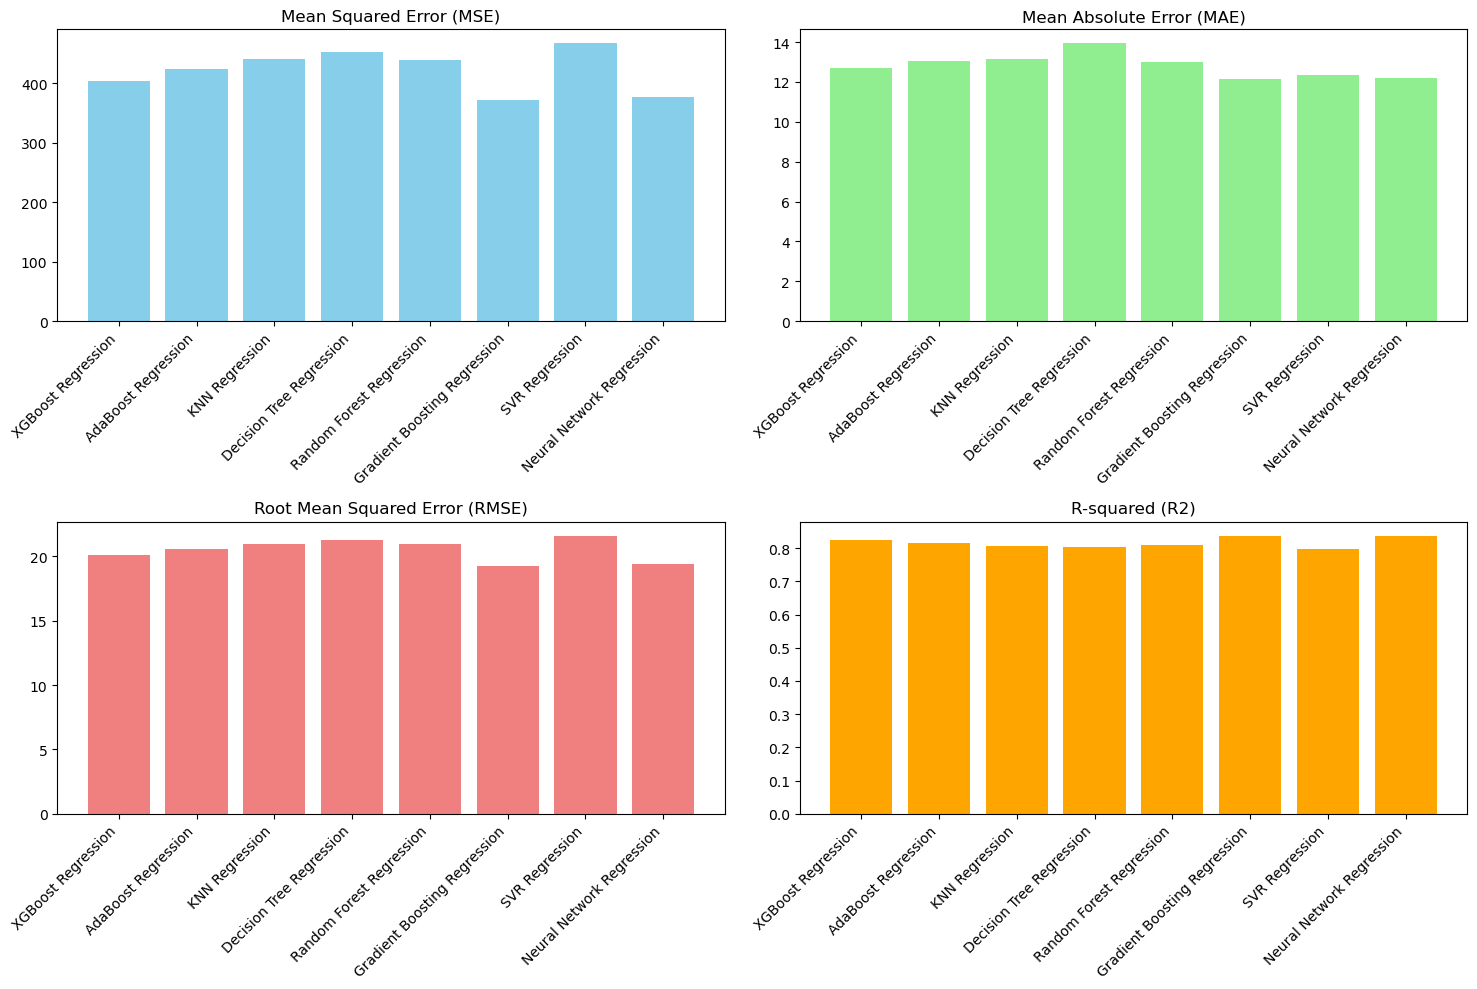

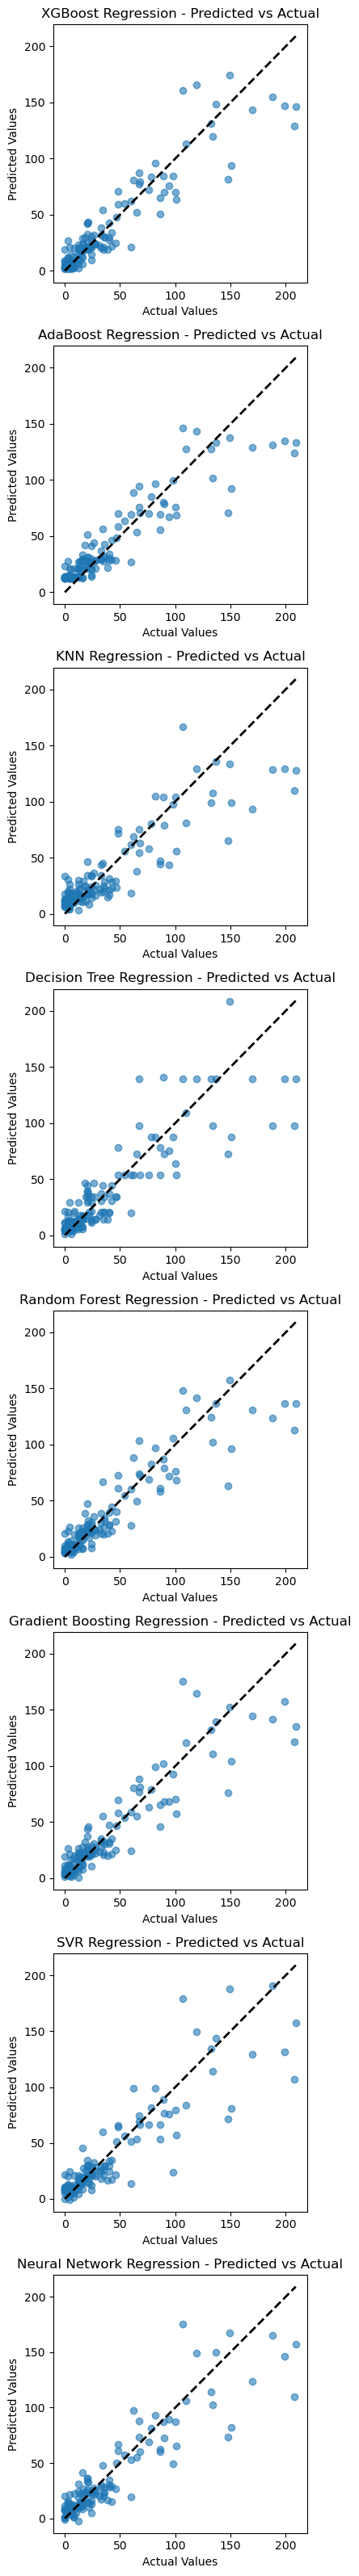

In [24]:
#using the MORE hyper-parameter tunning on the test set with 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.7,'subsample':0.7},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1,'loss':'linear'},
    'KNN Regression': {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 20,'min_samples_leaf':4},
    'Random Forest Regression': {'n_estimators': 10, 'max_depth': 20, 'min_samples_split': 2,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3,'subsample':1.0},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale','epsilon':0.05},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam','alpha':0.1,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)